# Clustering NIFTY Feature-Engineered Data

This notebook demonstrates unsupervised clustering (K-Means) on the feature-engineered NIFTY dataset.

- Data: `data/nifty/train/featured.csv`
- Libraries: pandas, numpy, scikit-learn, matplotlib, seaborn

---

In [13]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style='whitegrid', palette='muted', font_scale=1.1)
%matplotlib inline

In [14]:
# 2. Load the feature-engineered data
data_path = '../../data/nifty/train/featured.csv'
df = pd.read_csv(data_path)
print(f'Loaded {len(df)} rows and {len(df.columns)} columns.')
df.head()

Loaded 5967 rows and 21 columns.


,date,open,high,low,close,volume,daily_return,log_return,price_range,ma_5,...,volatility_5,volatility_20,rsi_14,macd_12_26,macd_signal_12_26,macd_histogram_12_26,macd_signal_strength,stoch_14,stoch_smoothk,stoch_smoothd
0,2001-01-01 00:00:00+05:30,1263.50,1276.15,1250.65,1254.30,0,NaN,NaN,25.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-02 00:00:00+05:30,1254.25,1279.59,1248.55,1271.80,0,0.013952,0.013856,31.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-03 00:00:00+05:30,1271.80,1293.55,1263.95,1291.25,0,0.015293,0.015178,29.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-04 00:00:00+05:30,1291.30,1331.35,1291.30,1307.65,0,0.012701,0.012621,40.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-05 00:00:00+05:30,1307.55,1330.30,1306.25,1327.25,0,0.014989,0.014877,24.05,1290.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Feature selection for clustering

We'll select a subset of features that are numeric and relevant for clustering.
You can adjust this list based on your analysis goals.

In [15]:
# Select features for clustering
features = [
    'daily_return', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd'
]
# Drop rows with missing values in selected features
X = df[features].dropna().copy()
print(f'Clustering on {X.shape[0]} rows and {X.shape[1]} features.')

Clustering on 5934 rows and 14 features.


## 4. Feature scaling

K-Means is sensitive to feature scale, so we standardize the features.

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.8843419 , -1.89686773, -0.6006788 , -1.08437132, -1.08774005,
         0.536822  ,  0.2807233 ,  0.12395179, -0.02076637, -0.00412074,
        -0.05760077, -0.33634498,  0.49022247,  0.67190337],
       [ 0.14259821,  0.14884819, -0.86909492, -1.08495619, -1.08726994,
         0.56616478,  0.21467319,  0.18939664, -0.03771204, -0.01143877,
        -0.09185274, -0.20291171,  0.21553038,  0.51259504],
       [-0.09248156, -0.08551822, -0.98222899, -1.08520324, -1.08696737,
         0.52860542,  0.17083302,  0.16434147, -0.05390324, -0.02072202,
        -0.11719401, -0.2396542 , -0.27708071,  0.14671463],
       [-0.77551669, -0.77074103, -0.83914767, -1.08598475, -1.08684162,
         0.57698497,  0.20063679, -0.19207285, -0.07822619, -0.03329955,
        -0.15967286, -1.20503834, -0.58560483, -0.22247719],
       [-0.85024848, -0.84610037, -0.73821433, -1.08805532, -1.08693319,
        -0.00798074,  0.21892569, -0.54260665, -0.10951286, -0.0499872 ,
        -0.21267213, -1.19

## 5. Choosing the number of clusters (Elbow Method)

We'll plot the inertia (within-cluster sum of squares) for different cluster counts.

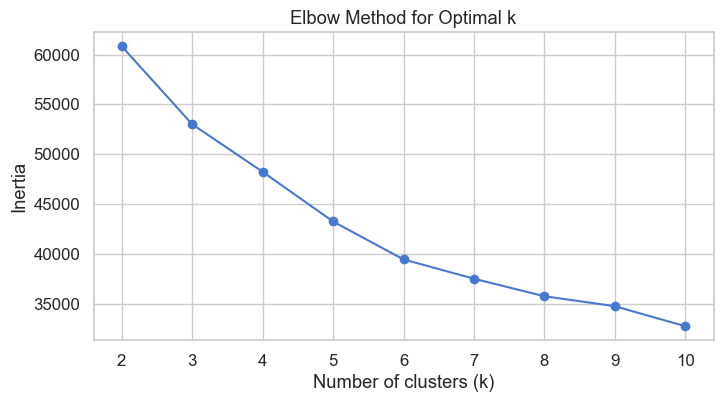

In [17]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

## 6. Fit K-Means and assign clusters

Choose the number of clusters based on the elbow plot above (e.g., k=3).

In [18]:
k = 3  # Change this based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters
df_clustered.head()

,date,open,high,low,close,volume,daily_return,log_return,price_range,ma_5,...,volatility_20,rsi_14,macd_12_26,macd_signal_12_26,macd_histogram_12_26,macd_signal_strength,stoch_14,stoch_smoothk,stoch_smoothd,cluster
33,2001-02-16 00:00:00+05:30,1415.85,1422.95,1376.15,1381.35,0,-0.024952,-0.025269,46.8,1396.96,...,0.013554,56.121245,24.611369,26.630119,-2.018750,2.018750,49.268293,74.394226,79.212137,0
34,2001-02-19 00:00:00+05:30,1381.40,1392.05,1369.45,1384.80,0,0.002498,0.002494,22.6,1393.48,...,0.013097,56.975273,22.668833,25.837862,-3.169029,3.169029,53.475610,66.265109,74.632775,0
35,2001-02-20 00:00:00+05:30,1384.85,1392.80,1380.40,1383.85,0,-0.000686,-0.000686,12.4,1392.01,...,0.012794,56.648313,20.812784,24.832846,-4.020062,4.020062,52.317073,51.686992,64.115442,0
36,2001-02-21 00:00:00+05:30,1383.90,1389.55,1364.25,1370.10,0,-0.009936,-0.009986,25.3,1387.36,...,0.013000,51.997258,18.024566,23.471190,-5.446624,5.446624,21.877310,42.556664,53.502922,2
37,2001-02-22 00:00:00+05:30,1370.05,1370.05,1335.65,1355.10,0,-0.010948,-0.011008,34.4,1375.04,...,0.013127,47.422941,14.438076,21.664568,-7.226491,7.226491,22.279496,32.157960,42.133872,2


## 7. Visualize clusters using PCA (2D plot)

We'll use PCA to reduce the feature space to 2D for visualization.

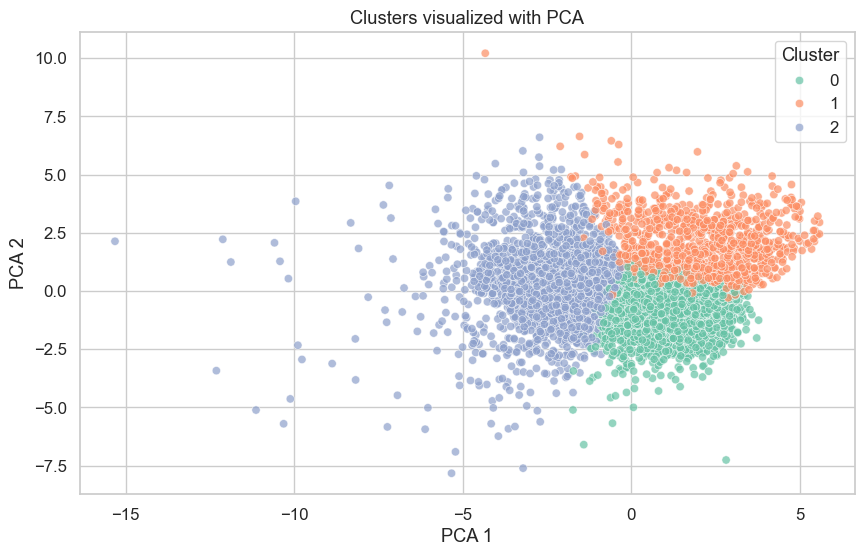

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', alpha=0.7)
plt.title('Clusters visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

## 8. Cluster analysis

Let's look at the mean values of each feature for each cluster.

In [20]:
df_clustered.groupby('cluster')[features].mean()

,daily_return,log_return,price_range,ma_5,ma_20,volatility_5,volatility_20,rsi_14,macd_12_26,macd_signal_12_26,macd_histogram_12_26,stoch_14,stoch_smoothk,stoch_smoothd
cluster,,,,,,,,,,,,,,
0,0.003120,0.003057,64.406392,5323.242232,5238.917359,0.009598,0.011326,61.962198,44.002596,31.933733,12.068863,81.234360,80.055476,78.227618
1,0.001226,0.001192,170.478983,17128.738379,16899.947365,0.006987,0.007960,63.197639,165.633561,150.307751,15.325810,76.538498,77.400889,77.651347
2,-0.002939,-0.003092,117.740670,7116.656186,7242.837782,0.013908,0.013519,41.404268,-53.120484,-31.165283,-21.955201,25.838974,26.999090,29.232967


---
You can further analyze clusters, visualize time series by cluster, or use other clustering algorithms as needed!